# 1. 2 variable logistic regression from scratch

In [40]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *

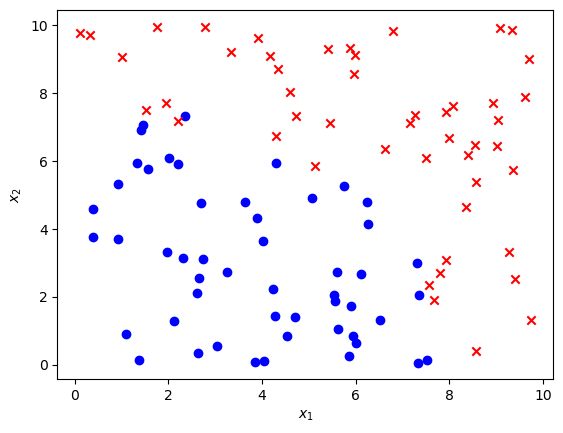

In [41]:
X_train = generate_multivariate_x(100, 2)
y_train = generate_binary_y(100)
plt_2d_binary_classification(X_train, y_train)
plt.show()

In [42]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 100000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent_logistic(X_train, y_train, w_init, b_init, compute_cost_logistic, compute_gradient_logistic, alpha, iterations)
print(f"b: {b_final:8.4f}")
for i in range(len(w_final)):
    print(f"w{i}: {w_final[i]:8.4f}") 

Iteration    0: Cost     0.68
Iteration  10000: Cost     0.26
Iteration  20000: Cost     0.23
Iteration  30000: Cost     0.21
Iteration  40000: Cost     0.21
Iteration  50000: Cost     0.20
Iteration  60000: Cost     0.20
Iteration  70000: Cost     0.20
Iteration  80000: Cost     0.20
Iteration  90000: Cost     0.19
b: -11.6884
w0:   1.1173
w1:   1.2563


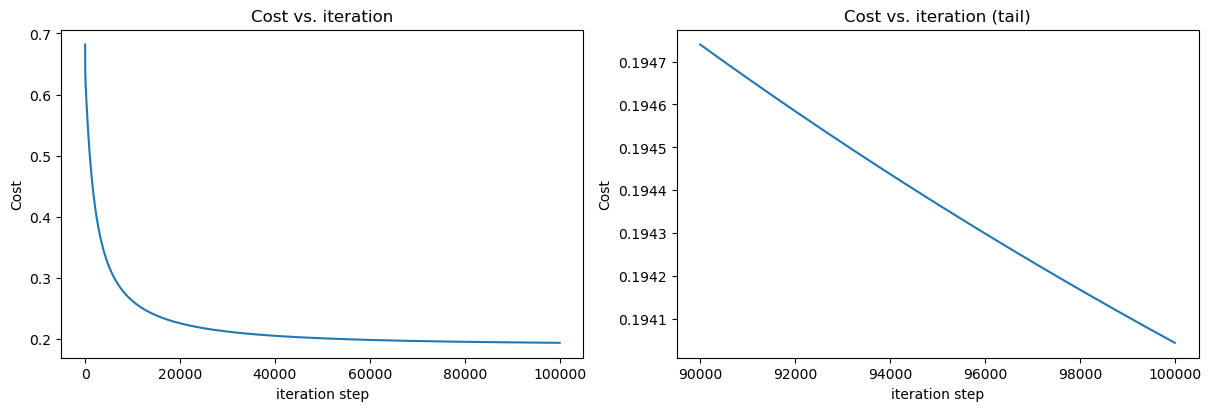

In [43]:
plt_hist(J_hist)
plt.show()

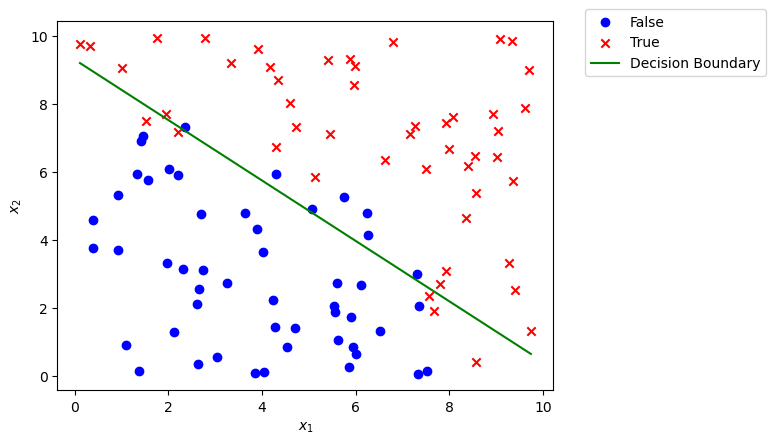

In [44]:
plot_decision_boundary(w_final, b_final, X_train, y_train)
plt.legend(["False", "True", "Decision Boundary"],  loc='upper left', bbox_to_anchor=(1.05, 1.05))
plt.show()

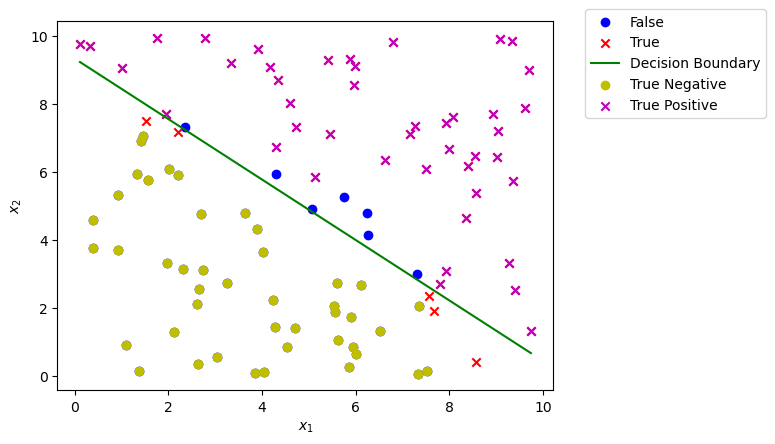

In [54]:
plot_decision_boundary(w_final, b_final, X_train, y_train)
y_pred = sigmoid(X_train.dot(w_final) + b_final)
y_pred = np.where(y_pred >= 0.5, 1, 0)
tp = np.where((y_pred == 1) & (y_train == 1))
tn = np.where((y_pred == 0) & (y_train == 0))
plt.scatter(X_train[tn, 0], X_train[tn, 1], marker='o', c='y')
plt.scatter(X_train[tp, 0], X_train[tp, 1], marker='x', c='m')

plt.legend(["False", "True", "Decision Boundary", "True Negative", "True Positive",
            ],  loc='upper left', bbox_to_anchor=(1.05, 1.05))
plt.show()

In [55]:
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")

f1 score:   0.8800
accuracy:   0.8800


# 2. 2 variable logistic regression using sklearn LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [57]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
w_final = log_reg.coef_[0]
b_final = log_reg.intercept_[0]

print(f"b: {b_final:8.4f}")
for i in range(len(w_final)):
    print(f"w{i}: {w_final[i]:8.4f}")

b: -11.7517
w0:   1.1204
w1:   1.2590


In [58]:
y_pred = log_reg.predict(X_train)
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")

f1 score:   0.8800
accuracy:   0.8800


# 3. Multivariate logistic regression from scratch

In [62]:
X_train = generate_multivariate_x(100, 5)
y_train = generate_binary_y(100)

In [63]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 100000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent_logistic(X_train, y_train, w_init, b_init, compute_cost_logistic, compute_gradient_logistic ,alpha, iterations)
print(f"b: {b_final:8.4f}")
for i in range(len(w_final)):
    print(f"w{i}: {w_final[i]:8.4f}") 

Iteration    0: Cost     0.68
Iteration  10000: Cost     0.35
Iteration  20000: Cost     0.29
Iteration  30000: Cost     0.26
Iteration  40000: Cost     0.25
Iteration  50000: Cost     0.24
Iteration  60000: Cost     0.23
Iteration  70000: Cost     0.22
Iteration  80000: Cost     0.22
Iteration  90000: Cost     0.22
b: -14.4789
w0:   0.3894
w1:   0.4765
w2:   0.7197
w3:   0.5142
w4:   0.7622


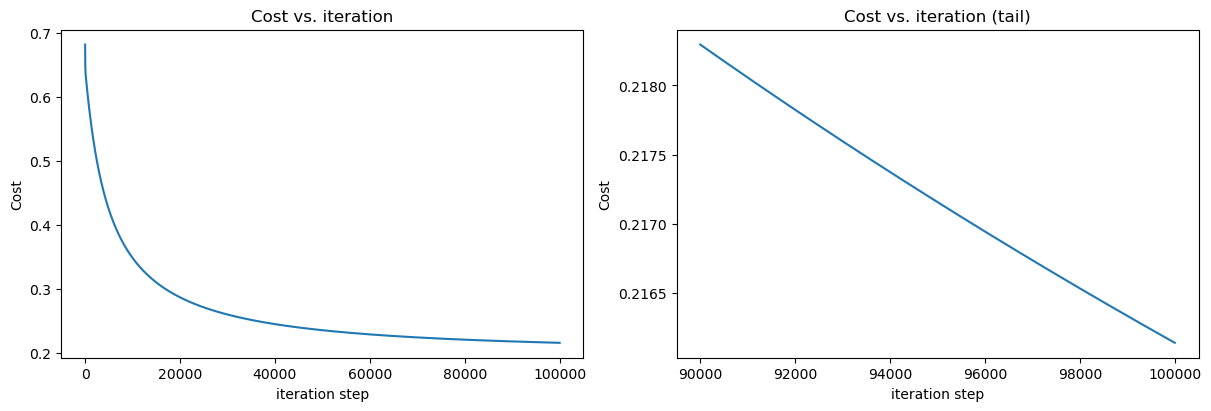

In [64]:
plt_hist(J_hist)
plt.show()

In [65]:
y_pred = sigmoid(np.dot(X_train, w_final) + b_final)
y_pred = np.where(y_pred > 0.5, 1, 0)
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
cost = J_hist[-1]
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")
print(f"Cost: {cost:8.4f}")

f1 score:   0.9400
accuracy:   0.9400
Cost:   0.2161


# 4. Multivariate logistic regression using sklearn LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score, accuracy_score

In [67]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
w_final = log_reg.coef_[0]
b_final = log_reg.intercept_[0]

print(f"b: {b_final:8.4f}")
for i in range(len(w_final)):
    print(f"w{i}: {w_final[i]:8.4f}")

b: -18.0465
w0:   0.5147
w1:   0.5967
w2:   0.8758
w3:   0.6242
w4:   0.9351


In [68]:
y_pred = log_reg.predict(X_train)
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
cost = log_loss(y_train, y_pred)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")
print(f"cost: {cost:8.4f}")

f1 score:   0.9293
accuracy:   0.9300
cost:   2.4177
